In [13]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In this code snippet, I imported essential libraries for data manipulation and handling warnings in a machine learning project.

- **Pandas**: Used for efficient data manipulation and analysis, providing data structures like DataFrame for working with structured data.
- **NumPy**: Although not explicitly used in this snippet, it is a fundamental library for numerical operations in Python. It often complements Pandas for handling numerical arrays and operations.
- **Warnings**: The warnings module is employed to filter and ignore any warnings that might be raised during the execution of the code. This can be useful to prevent warnings from cluttering the output and affecting the readability of results.

In [14]:
df=pd.read_csv('hmnist_28_28_RGB.csv.zip')

This code line uses Pandas to read a compressed CSV file `('hmnist_28_28_RGB.csv.zip')` and creates a DataFrame. It's a standard step for loading data in a machine learning project.

In [15]:
df.tail()

,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
10010,183,165,181,182,165,180,184,166,182,188,...,208,185,187,208,186,186,206,187,189,0
10011,2,3,1,38,33,32,121,104,103,132,...,96,79,76,24,23,21,3,4,1,0
10012,132,118,118,167,149,149,175,156,160,184,...,204,181,178,181,159,153,172,151,145,0
10013,160,124,146,164,131,152,167,127,146,169,...,185,162,167,184,157,166,185,162,172,0
10014,175,142,121,181,150,134,181,150,133,178,...,159,79,82,174,137,125,175,139,126,6


Here, df.tail() is used to display the last few rows of the DataFrame df. This is a quick way to inspect the end of the dataset and get a sense of its structure. It's often used for a preliminary examination to check data integrity, variable types, and potential issues, ensure that df is defined and contains data before calling this method.

In [16]:
fractions=np.array([0.8,0.2])
df=df.sample(frac=1)
train_set, test_set = np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))

In this code snippet, the dataset is being split into training and test sets. Here's a breakdown:

- `df.sample(frac=1)`: Shuffles the DataFrame randomly, ensuring a diverse representation in both the training and test sets.
- `np.array_split(df, (fractions[:-1].cumsum() * len(df)).astype(int))`: Splits the shuffled DataFrame into training and test sets based on the specified fractions. The cumulative sum of the fractions determines the split points.

This approach is common in machine learning to ensure a representative distribution of data in both sets. It's essential to verify that `df` is loaded and contains the expected data before executing this code.

In [17]:
display(len(train_set))
display(len(test_set))

8012

2003

This code utilizes the `display` function to show the lengths of the training set (`train_set`) and the test set (`test_set`). This approach is helpful for a clear and concise display of the dataset sizes during exploratory data analysis or when presenting results.

In [18]:
df.label.unique()

array([2, 4, 1, 0, 6, 5, 3], dtype=int64)

This code line retrieves the unique values of the 'label' column in the DataFrame `df`. The `unique()` method is commonly used to identify distinct categories or classes in a categorical variable, which is often crucial in classification tasks.

In [19]:
classes={
    0:('akiec', 'actinic keratoses and intraepithelial carcinomae'),
    1:('bcc' , 'basal cell carcinoma'),         
    2:('bkl', 'benign keratosis-like lesions'),         
    3:('df', 'dermatofibroma'),         
    4:('nv', ' melanocytic nevi'),         
    5:('vasc', ' pyogenic granulomas and hemorrhage'),         
    6:('mel', 'melanoma'),
}

This code defines a dictionary `classes` mapping numerical labels to corresponding skin disease categories, this is a common practice in machine learning, where numeric labels are associated with human-readable class names, the clarity of class definitions enhances the interpretability of model results and facilitates further analysis

In [20]:
y_train=train_set['label']
x_train=train_set.drop(columns=['label'])
y_test=test_set['label']
x_test=test_set.drop(columns=['label'])
columns=list(x_train)

This set of code lines extracts the target labels (`y_train` and `y_test`) and feature sets (`x_train` and `x_test`) from the training and test sets, respectively. Additionally, it captures the list of column names in the variable `columns`. This structure is common in machine learning workflows, separating features and labels for training and testing, it is crucial to verify that the specified column names ('label') exist in the datasets before running these operations.

In [21]:
import torch

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
display(device)

device(type='cpu')

This code determines whether a CUDA-enabled GPU is available. If so, it sets the device to GPU ('cuda:0'), otherwise to CPU. This is crucial for optimizing deep learning tasks, as GPUs excel in parallel computations, significantly speeding up neural network training.

In [23]:
from imblearn.over_sampling import RandomOverSampler 

oversample = RandomOverSampler()

x_train,y_train  = oversample.fit_resample(x_train,y_train)

The code uses the RandomOverSampler from the imbalanced-learn library to address class imbalance in the training data. Class imbalance can lead to biased models, as the algorithm might give more weight to the majority class. RandomOverSampler balances the class distribution by oversampling the minority class, creating synthetic samples. This helps improve the model's ability to generalize and make more accurate predictions on the minority class.

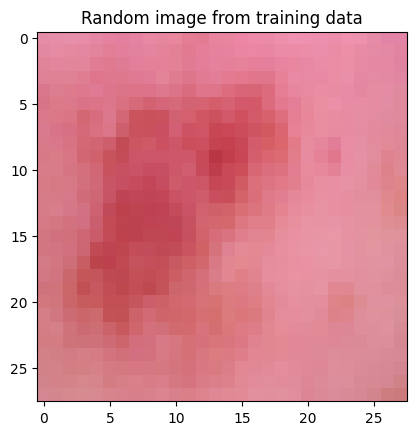

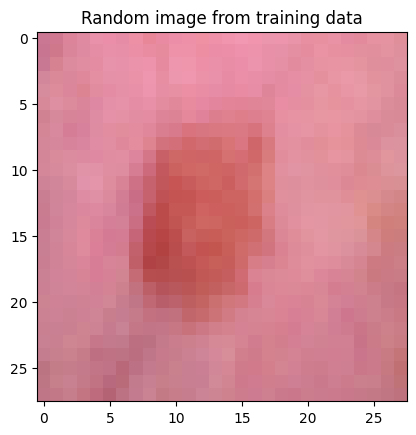

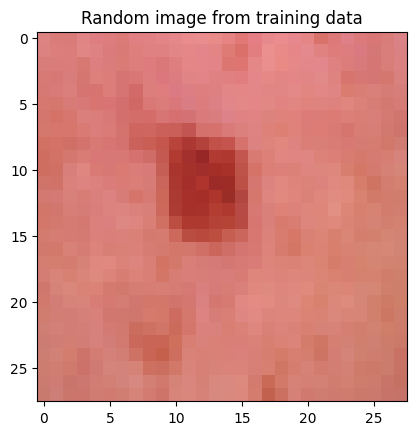

In [26]:
import matplotlib.pyplot as plt
import random

num=random.randint(0,8000)
x_train=np.array(x_train, dtype=np.uint8).reshape(-1,28,28,3)

plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()
num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

num=random.randint(0,8000)
plt.imshow(x_train[num].reshape(28,28,3))
plt.title("Random image from training data")
plt.show()

The `show_random_image` function is designed to display a random image, it takes two parameters - the dataset (`data`) containing image data and a `title` for the displayed image, this function encapsulates the logic of selecting a random image, reshaping it to the standard dimensions (28x28x3), and presenting it with the specified title using Matplotlib.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D
import tensorflow as tf

Importing essential libraries for a machine learning project, TensorFlow is a popular open-source machine learning library. 

- Sequential: Used to create a linear stack of layers in a neural network.
- Conv2D: Convolutional layer for 2D spatial convolution. Commonly used in image processing.
- Flatten: Used to flatten the input, necessary when transitioning from convolutional to fully connected layers.
- Dense: Fully connected layer, where each neuron is connected to every neuron in the previous and next layers.
- MaxPool2D: Max pooling layer for 2D spatial data. It reduces spatial dimensions and retains the most important information.
- tensorflow as tf: Renaming the imported TensorFlow module for brevity in code.

In [28]:
%time 

model = Sequential()

model.add(Conv2D(16, 
                 kernel_size = (3,3), 
                 input_shape = (28, 28, 3), 
                 activation = 'relu', 
                 padding = 'same'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(32, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(64, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))

model.add(tf.keras.layers.BatchNormalization())

model.add(Conv2D(128, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Conv2D(256, 
                 kernel_size = (3,3), 
                 activation = 'relu'))

model.add(Flatten())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(256,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(128,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(64,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(32,activation='relu'))

model.add(tf.keras.layers.BatchNormalization())
model.add(Dense(7,activation='softmax'))

model.summary()

CPU times: total: 0 ns
Wall time: 0 ns


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 14, 14, 16)        64        
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 32)        4640      
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_

The provided code defines a Convolutional Neural Network (CNN) using the Keras Sequential API. The architecture includes convolutional layers with varying filter sizes, max-pooling layers, batch normalization, dropout for regularization, and dense layers for classification. The model's architecture and parameter details can be summarized using the `model.summary()` function.

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_callback = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_accuracy', 
    save_best_only=True,
    mode='max',
    verbose=1
)

The provided code initializes a ModelCheckpoint callback using TensorFlow's Keras library. This callback will monitor the validation accuracy during training and save the model with the highest validation accuracy to a file named 'best_model.h5'. The `save_best_only` parameter ensures that only the best-performing model is saved, and the `verbose` parameter is set to 1 for detailed output during training.

In [30]:
%time 

optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer =optimizer,
              metrics = ['accuracy'])

CPU times: total: 0 ns
Wall time: 0 ns


The code compiles a Keras model using the Adam optimizer with a learning rate of 0.001. The chosen loss function is sparse categorical crossentropy, and the training progress will be evaluated based on accuracy.

In [31]:
from datetime import datetime

start_time = datetime.now()
history = model.fit(x_train,
                    y_train,
                    validation_split=0.2,
                    batch_size=128,
                    epochs=50,
                    shuffle=True,
                    callbacks=[checkpoint_callback])
end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Epoch 1/50


235/235 [==============================] - ETA: 0s - loss: 1.1222 - accuracy: 0.6001
Epoch 1: val_accuracy improved from -inf to 0.32253, saving model to best_model.h5
235/235 [==============================] - 12s 35ms/step - loss: 1.1222 - accuracy: 0.6001 - val_loss: 2.0956 - val_accuracy: 0.3225
Epoch 2/50
234/235 [============================>.] - ETA: 0s - loss: 0.3916 - accuracy: 0.8701
Epoch 2: val_accuracy improved from 0.32253 to 0.39240, saving model to best_model.h5
235/235 [==============================] - 8s 35ms/step - loss: 0.3915 - accuracy: 0.8701 - val_loss: 1.4764 - val_accuracy: 0.3924
Epoch 3/50
233/235 [============================>.] - ETA: 0s - loss: 0.2546 - accuracy: 0.9132
Epoch 3: val_accuracy improved from 0.39240 to 0.48173, saving model to best_model.h5
235/235 [==============================] - 8s 34ms/step - loss: 0.2547 - accuracy: 0.9133 - val_loss: 1.1529 - val_accuracy: 0.4817
Epoch 4/50
234/235 [============================>.] - ETA:

The code snippet performs training on the specified Keras model (`model`) using training data (`x_train` and `y_train`). Training lasts for 50 epochs with a batch size of 128, and 20% of the data is used for validation. The `shuffle` parameter randomizes the order of training samples. The `ModelCheckpoint` callback is utilized for saving the best model during training. The duration of the training process is then printed.

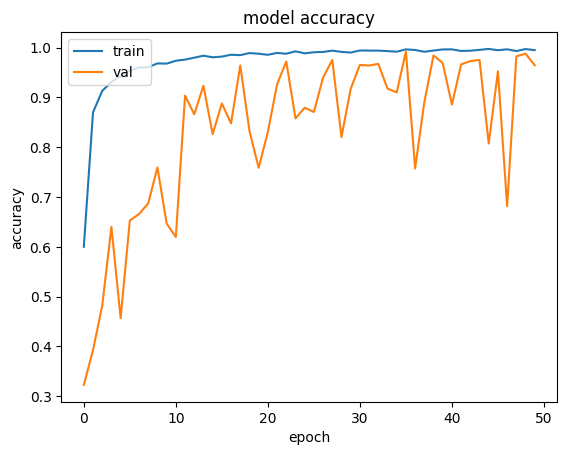

In [32]:
#plot of accuracy vs epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The code generates a plot displaying the model's accuracy over epochs. The training accuracy is represented by the 'train' curve, while the validation accuracy is represented by the 'val' curve. This visualization helps assess the model's performance and potential overfitting or underfitting during training.

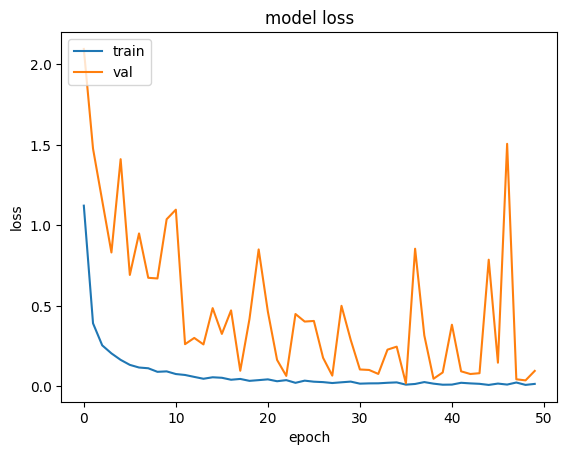

In [33]:
#plot of loss vs epoch

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The code creates a plot illustrating the model's loss over epochs. The 'train' curve represents the training loss, while the 'val' curve represents the validation loss. Monitoring these curves aids in understanding the model's learning progress and identifying potential issues such as underfitting or overfitting.

In [34]:
model.load_weights('best_model.h5')

The code snippet loads the weights of the best-performing model, as saved by the `ModelCheckpoint` callback during training. The file 'best_model.h5' contains the saved weights, ensuring that the model is restored to its optimal state.

In [35]:
x_test=np.array(x_test).reshape(-1,28,28,3)

loss, acc = model.evaluate(x_test, y_test, verbose=2)

63/63 - 1s - loss: 1.4718 - accuracy: 0.7479 - 990ms/epoch - 16ms/step


The code evaluates the trained model's performance on the test dataset (`x_test` and `y_test`). The resulting loss and accuracy metrics provide valuable insights into how well the model generalizes to previously unseen data.

In [36]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(y_test, y_pred)


63/63 [==============================] - 1s 10ms/step


The code calculates the confusion matrix using scikit-learn. It predicts labels for the test data using the trained model and compares them with the true labels. The resulting confusion matrix (`conf_mat`) offers a comprehensive view of the model

In [41]:
import PIL

image=PIL.Image.open("C:\\Users\\maraujo\\Desktop\\2.jpeg")
image=image.resize((28,28))
img=x_test[1]
img=np.array(image).reshape(-1,28,28,3)
result=model.predict(img)
print(result[0])
result=result.tolist()
max_prob=max(result[0])
class_ind=result[0].index(max_prob)
print(classes[class_ind])

1/1 [==============================] - 0s 42ms/step
[6.7934143e-06 1.7062312e-07 4.3806731e-06 4.7039691e-08 9.9997354e-01
 6.7593987e-07 1.4500788e-05]
('nv', ' melanocytic nevi')


The code reads and resizes an image (`2.jpeg`) using the PIL library. It then converts the image to a NumPy array and reshapes it to match the model's input shape. The model predicts the class probabilities for the image, and the class with the highest probability is printed along with its corresponding label from the `classes` list.